In [3]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

### 01 - Data Description.

column names | meaning 
--- | --- 
**income >50K** | continuous.
**age** | continuous.
**workclass** | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
**education** | Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate.
**education_num** | Number of years of education in total.
**marital_status** | Divorced, Married-AF-spouse, Married-civ-spouse, Married-spouse-absent, Never-married, Separated, and Widowed.
**occupation** | Adm-clerical, Armed-Forces, Craft-repair, Exec-managerial, Farming-fishing, Handlers-cleaners, Machine-op-inspct, Other-service, Priv-house-serv, Prof-specialty, Protective-serv, Sales, Tech-support, and Transport-moving.
**relationship** | Husband, Not-in-family, Other-relative, Own-child, Unmarried, and Wife.
**race** | Amer-Indian-Eskimo, Asian-Pac-Islander, Black, Other, and White.
**sex** | Female and Male.
**capital_gain** | continuous.
**capital_loss** | continuous.
**hours-per-week** | continuous.
**native-country:** | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.




**Goal.1:Using logistic regression to predict whether a person makes over 50K a year.**

**Goal.2.To identify if male and female equally earn above 50k yearly.If not why?.**

**Goal.3.To identify income differences between races.**

**Goal.4.To identify income differences between ages.**

### 02 - Getting Data.

In [297]:
df = pd.read_csv('income.csv')
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


### 03 - Cleaning Data and EDA

An observation selected first five from the dataset

In [183]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


An observation selected last five from the dataset

View the columns names and rename them

In [187]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income >50K'],
      dtype='object')

In [304]:
cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower().replace('-','_'))
df.columns = cols
print(df.columns)

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income >50k'],
      dtype='object')


In [305]:
cols

['age',
 'workclass',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income >50k']

In [191]:
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income >50k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  31978 non-null  object
 13  income >50k     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


Summary statistics of the numerical features

In [195]:
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week,income >50k
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


Summary statistics of the categorical features

In [196]:
df.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
count,30725,32561,32561,30718,32561,32561,32561,31978
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


Summary statistics of the categorical values revealed that some variables have missing values, this can been displyed from the count.To dig deeper the following function help to show clearly variables with the missing values.

Checking the missing data

In [197]:
df.isna().sum()

age                  0
workclass         1836
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income >50k          0
dtype: int64

Checking missing data visually

<AxesSubplot:>

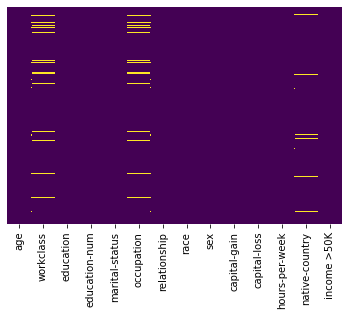

In [298]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

Replacing nan value by filling with the nearest number on its own column

In [300]:
df['workclass'] = df['workclass'].fillna(method='ffill').fillna(method='bfill')

In [301]:
df['occupation'] = df['occupation'].fillna(method='ffill').fillna(method='bfill')

In [306]:
df['native_country'] = df['native_country'].fillna(method='ffill').fillna(method='bfill')

In [307]:
df.isna().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income >50k       0
dtype: int64

After replacing missing nan value, again null values are checked visually

<AxesSubplot:>

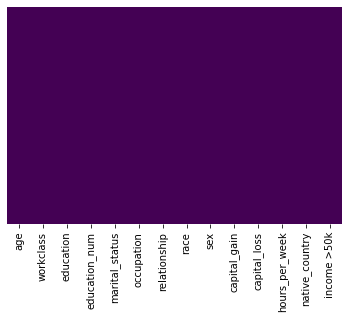

In [308]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

### Data Exploration

#### Categorical Data Visualization

In [202]:
df_cats = df.drop(columns=df_nums.columns)

In [203]:
df_cats

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


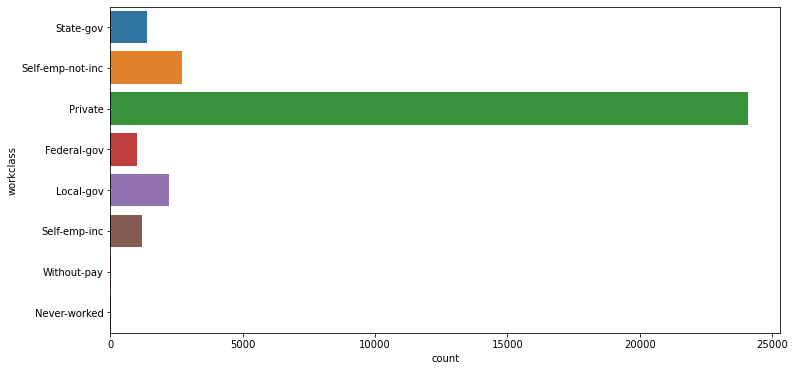

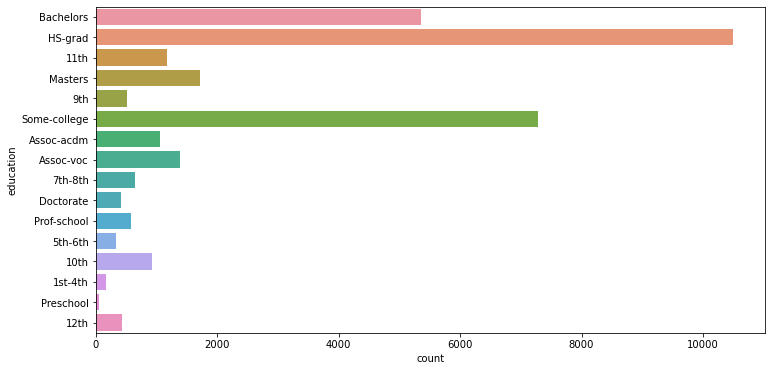

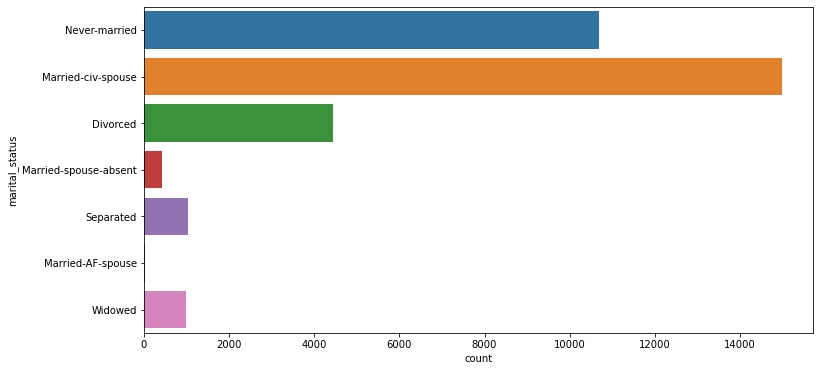

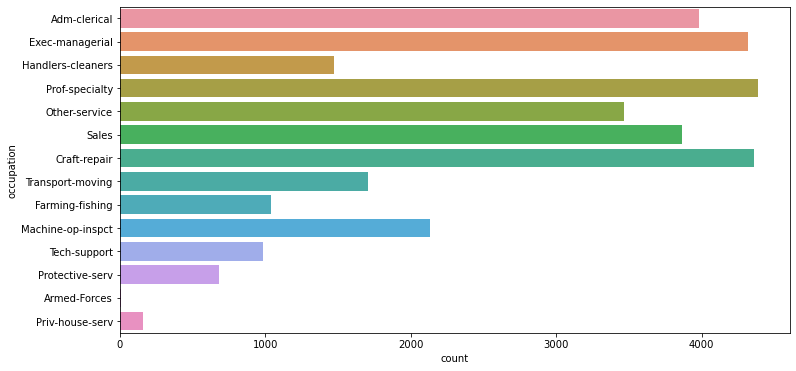

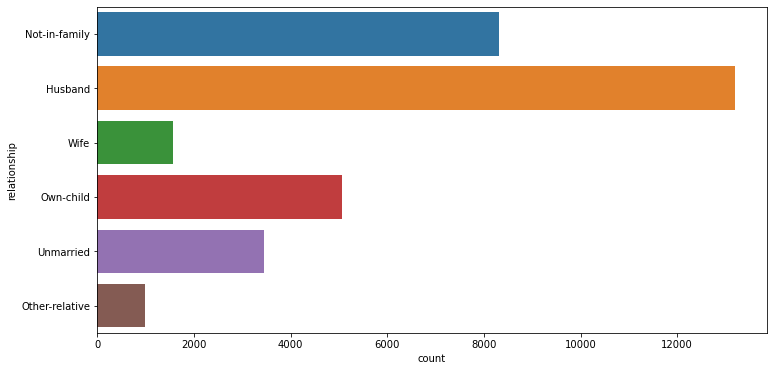

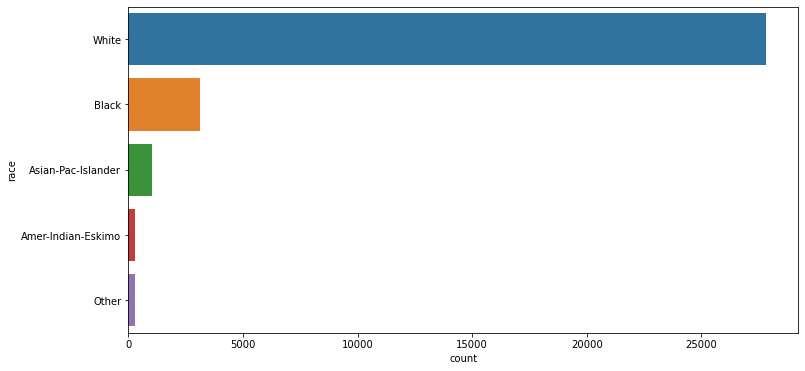

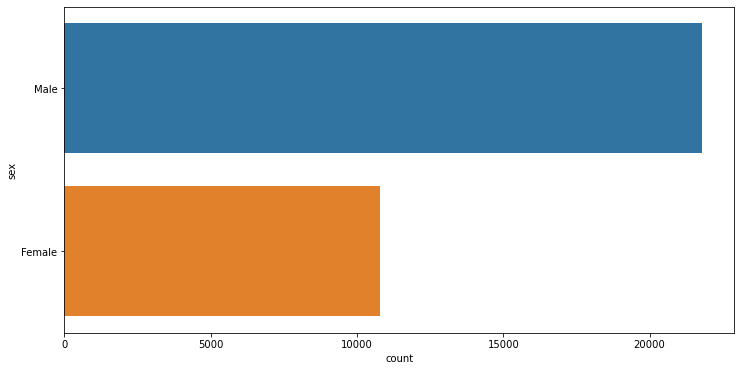

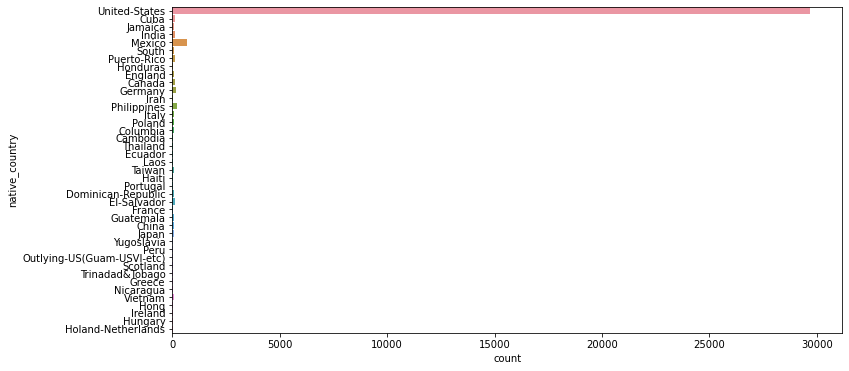

In [204]:
for column in df_cats.select_dtypes(include='object'):
    if df_cats[column].nunique():
        fig, ax = plt.subplots(figsize=(12,6))
        sns.countplot(y=column, data=df_cats)
        plt.show()

#### Numerical Data Visualization

In [206]:
df_nums = df._get_numeric_data()
df_nums 

,age,education_num,capital_gain,capital_loss,hours_per_week,income >50k
0,39,13,2174,0,40,0
1,50,13,0,0,13,0
2,38,9,0,0,40,0
3,53,7,0,0,40,0
4,28,13,0,0,40,0
...,...,...,...,...,...,...
32556,27,12,0,0,38,0
32557,40,9,0,0,40,1
32558,58,9,0,0,40,0
32559,22,9,0,0,20,0


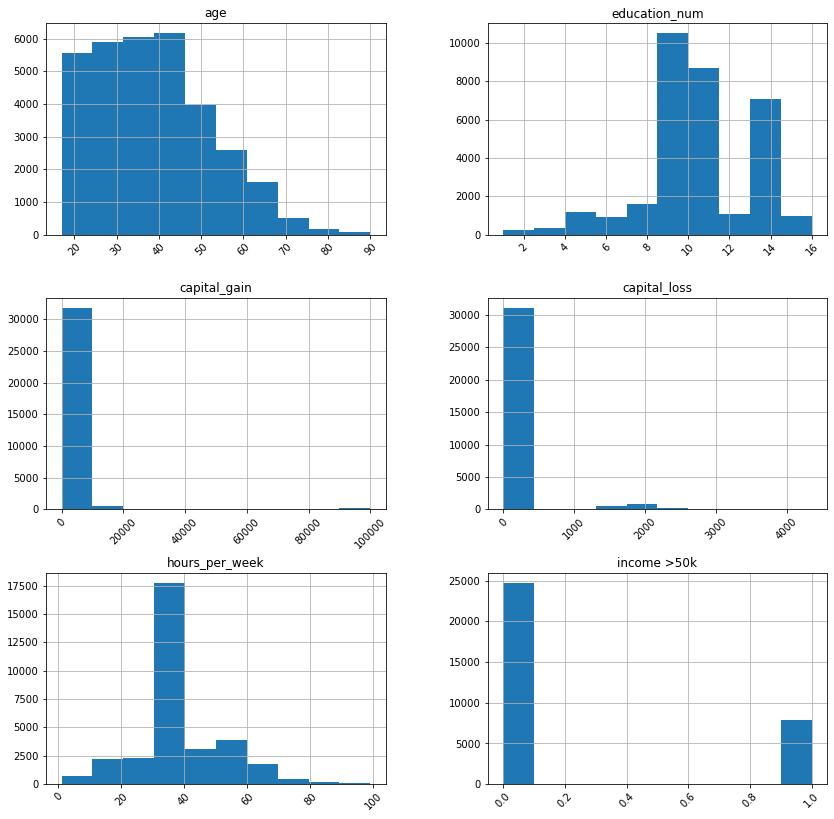

In [207]:
df.hist(figsize=(14,14), xrot=45)
plt.show()

Histogram bar plot revealed that income is categorical

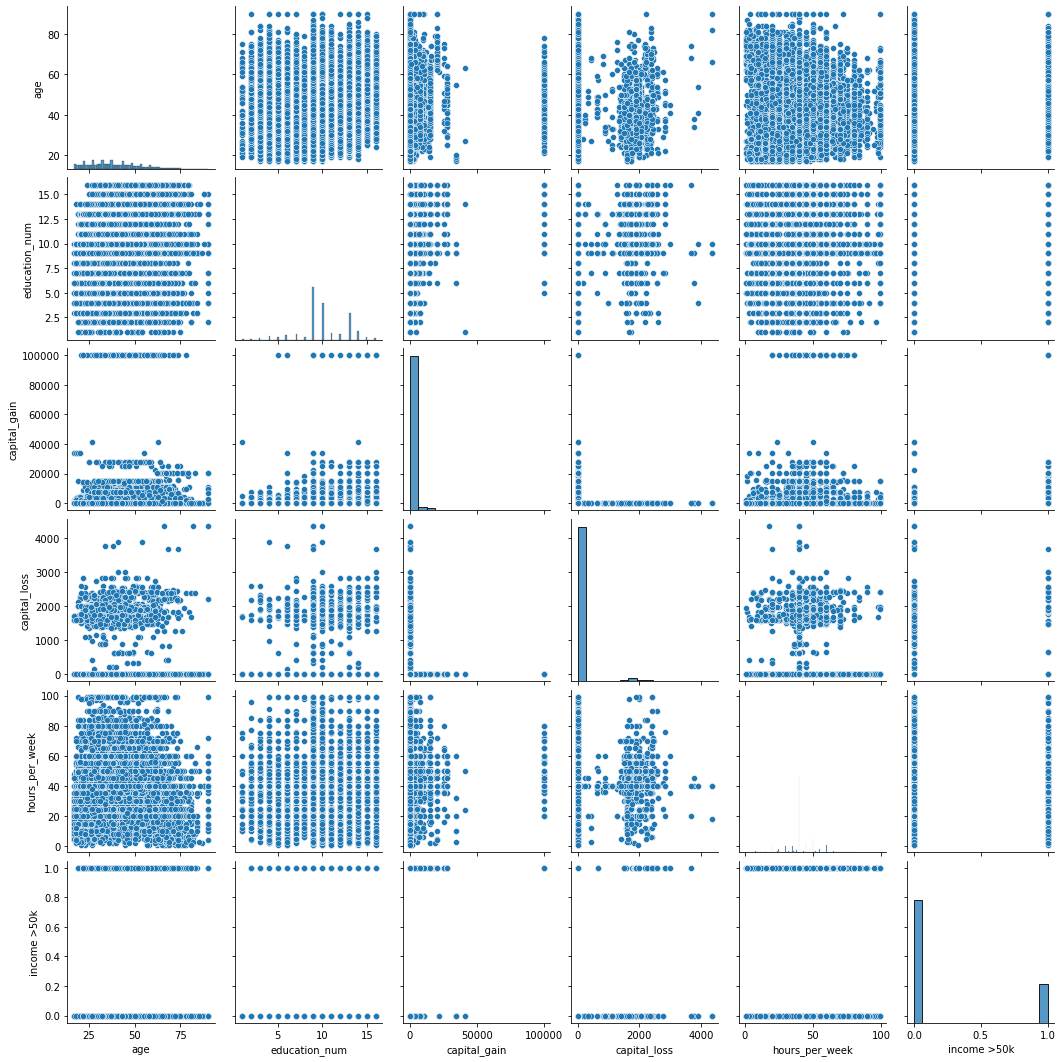

In [208]:
sns.pairplot(df_nums)

## Visualization of target variable and independent variables

Get customer income counts

In [14]:
df['income >50k'].value_counts()

0    24720
1     7841
Name: income >50k, dtype: int64

visualize the counts of income

<AxesSubplot:xlabel='income >50k', ylabel='count'>

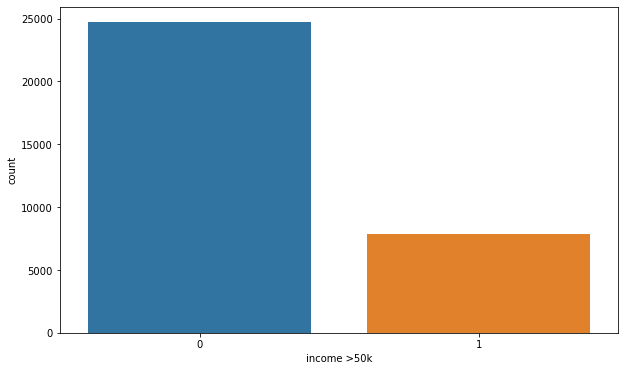

In [99]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(df['income >50k'])

Renaming income column

In [209]:
people_income=df.rename(columns={'income >50k':'income_more_than_50k_dollar'})

In [210]:
people_income

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_more_than_50k_dollar
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


Percentage of people receiving above 50,000 dollars annually

In [19]:
num_below_50k = people_income[people_income.income_more_than_50k_dollar == 0].shape[0]
num_above_50k = people_income[people_income.income_more_than_50k_dollar == 1].shape[0]

Percentage of people earning above 50k_dollars annually

In [20]:
(num_above_50k/(num_above_50k+num_below_50k)*100, '% of people earning above 50k_dollar.')

(24.080955744602438, '% of people earning above 50k_dollar.')

Percentage of people earning below 50k_dollars annually

In [21]:
(num_below_50k/(num_below_50k+num_above_50k)*100, '% of people earning below 50k_dollar.')

(75.91904425539757, '% of people earning below 50k_dollar.')

Comparative visualization for male and female for income receipt of more than 50k_dollars annually

<AxesSubplot:xlabel='sex', ylabel='count'>

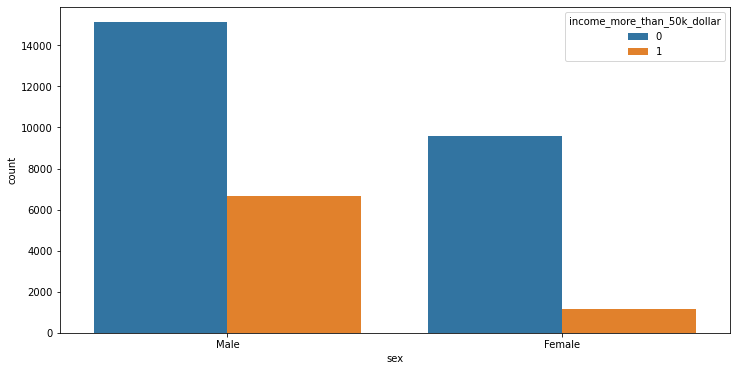

In [70]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x ='sex',hue='income_more_than_50k_dollar' , data = people_income )

visualize income of more than 50k dollars and age

<AxesSubplot:xlabel='age', ylabel='count'>

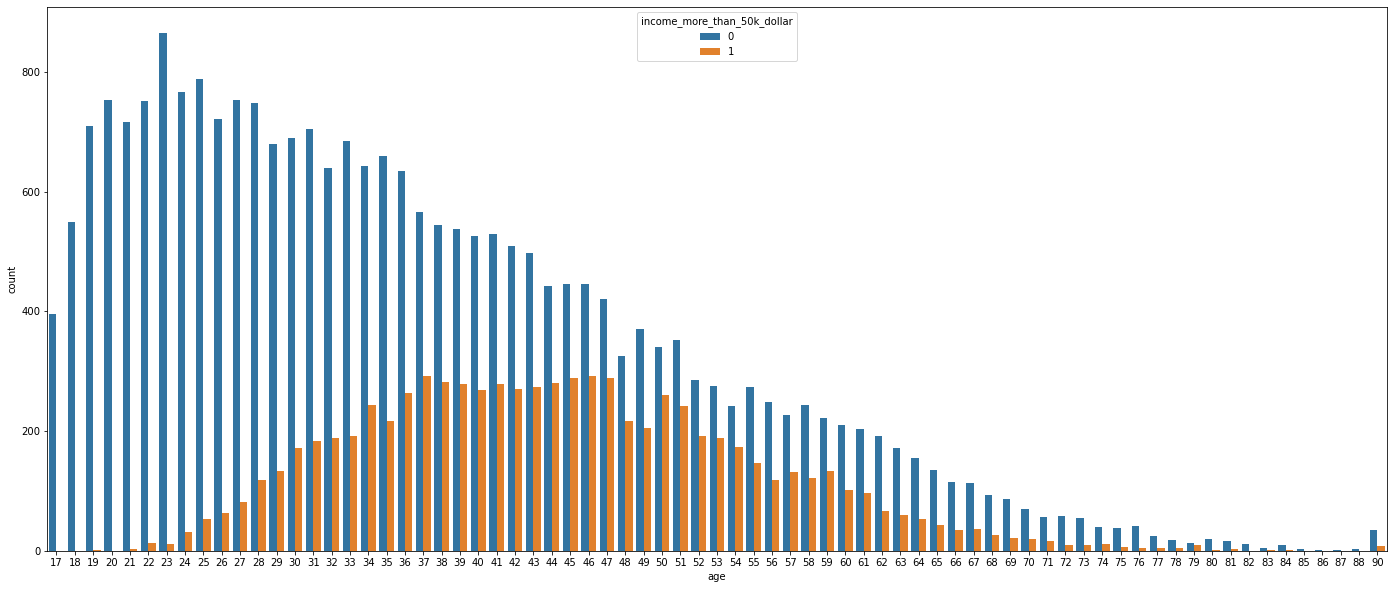

In [68]:
fig, ax = plt.subplots(figsize=(24,10))
sns.countplot(x ='age',hue='income_more_than_50k_dollar' , data = people_income )

visualize income of more than 50k dollars and age

<AxesSubplot:xlabel='race', ylabel='count'>

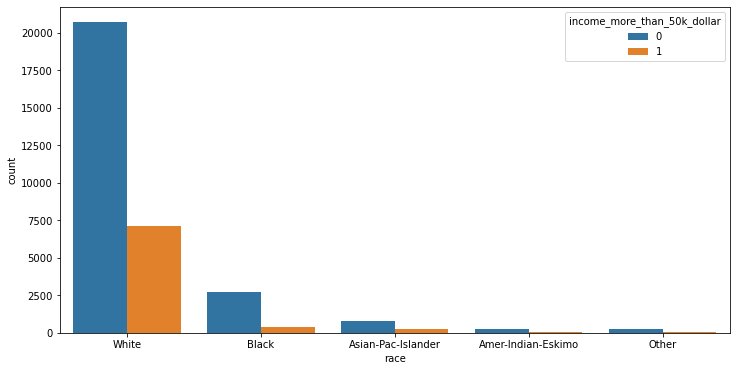

In [64]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x ='race',hue='income_more_than_50k_dollar' , data = people_income )


visualize income of more than 50k dollars and marital status

<AxesSubplot:xlabel='marital_status', ylabel='count'>

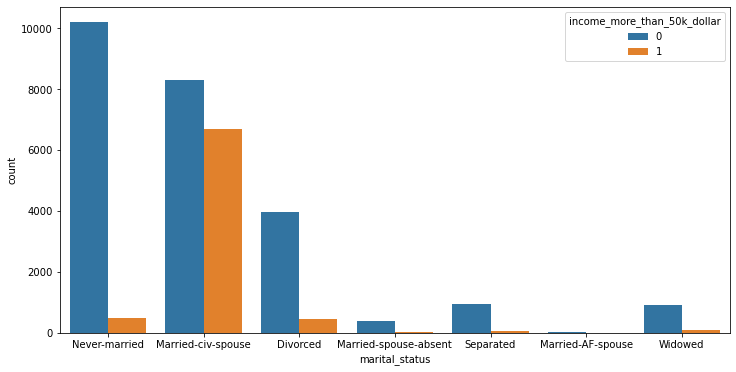

In [75]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x ='marital_status',hue='income_more_than_50k_dollar' , data = people_income )

visualize income of more than 50k dollars and marital status

<AxesSubplot:xlabel='hours_per_week', ylabel='count'>

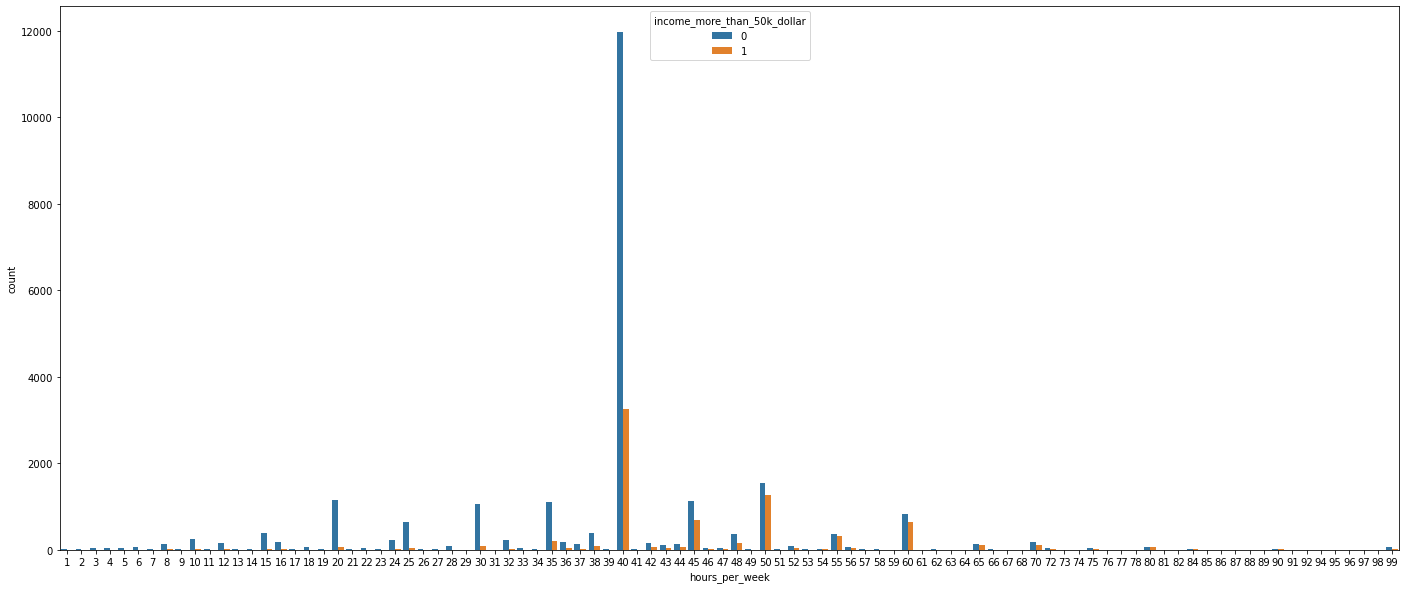

In [71]:
fig, ax = plt.subplots(figsize=(24,10))
sns.countplot(x ='hours_per_week',hue='income_more_than_50k_dollar' , data = people_income )

In [ ]:
df = px.data.gapminder().query("year == 2007")
fig = px.treemap(df, path=[px.Constant('world'), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'])
fig.show()

<AxesSubplot:xlabel='education', ylabel='count'>

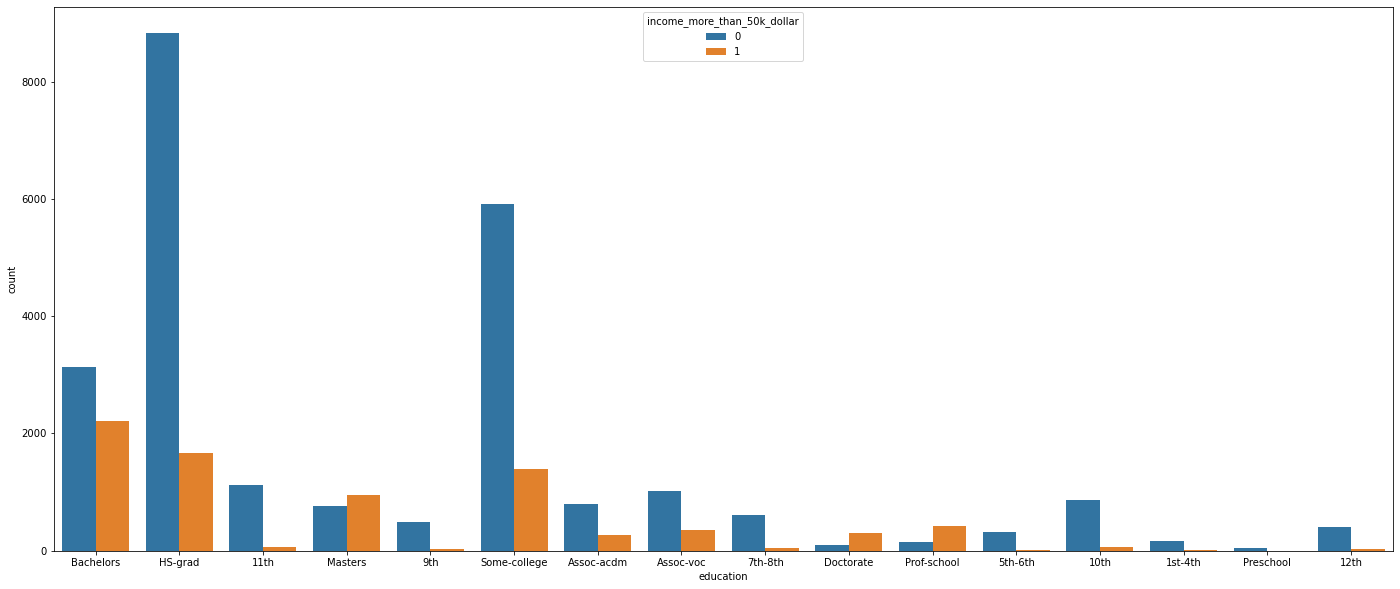

In [112]:
fig, ax = plt.subplots(figsize=(24,10))
sns.countplot(x ='education',hue='income_more_than_50k_dollar' , data = people_income )

<AxesSubplot:xlabel='education_num', ylabel='count'>

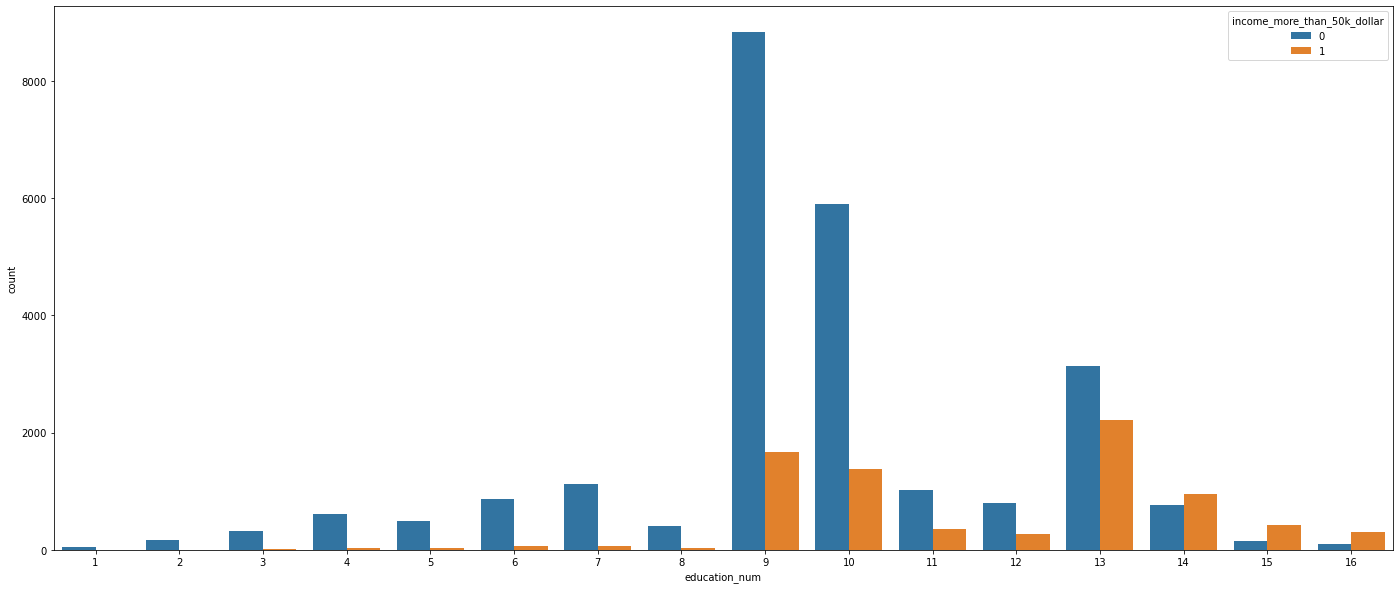

In [113]:
fig, ax = plt.subplots(figsize=(24,10))
sns.countplot(x ='education_num',hue='income_more_than_50k_dollar' , data = people_income )

<AxesSubplot:xlabel='occupation', ylabel='count'>

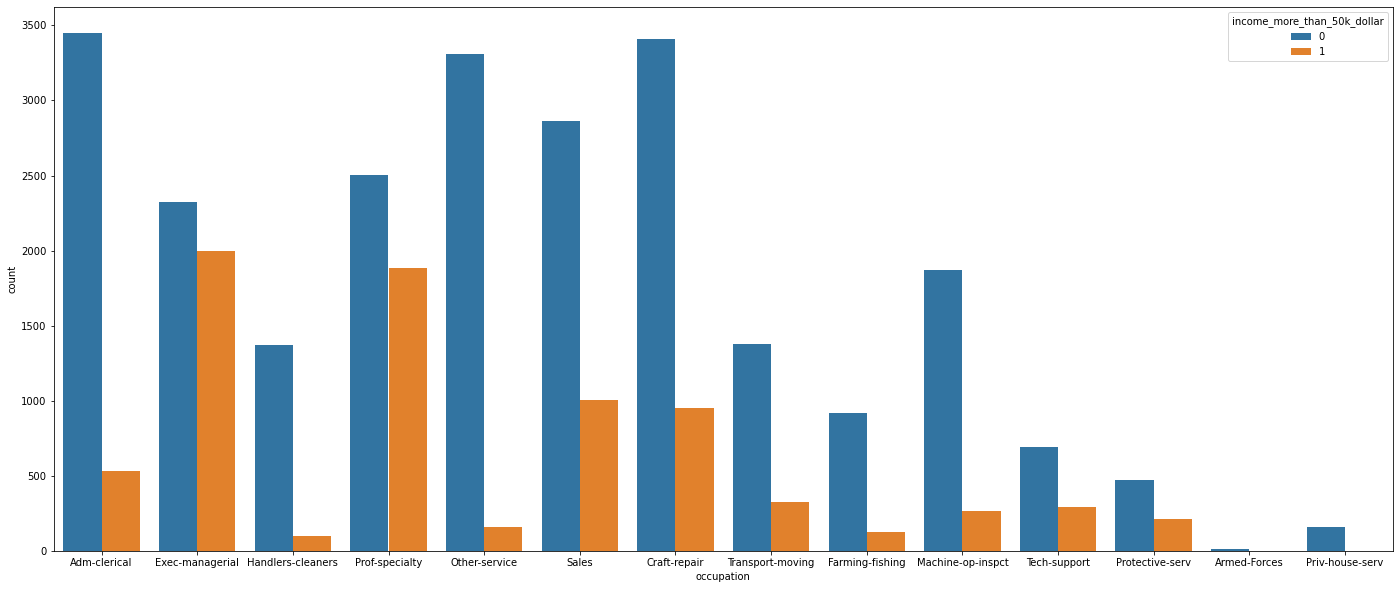

In [114]:
fig, ax = plt.subplots(figsize=(24,10))
sns.countplot(x ='occupation',hue='income_more_than_50k_dollar' , data = people_income )

<AxesSubplot:xlabel='relationship', ylabel='count'>

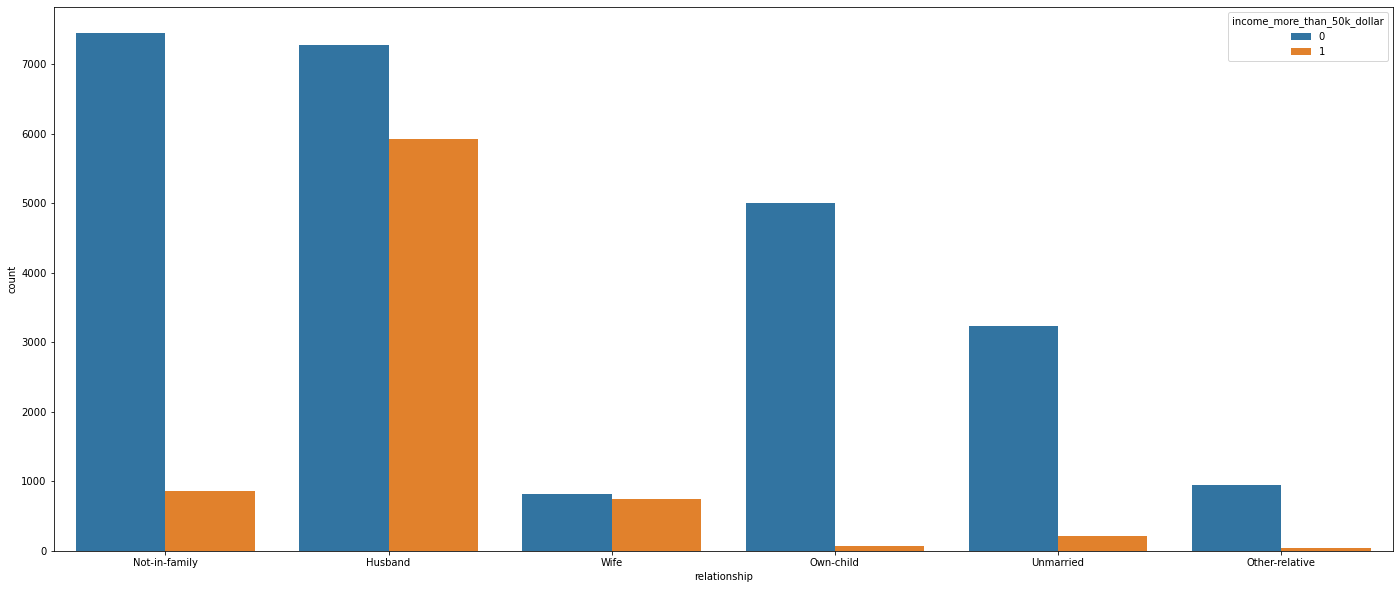

In [137]:
fig, ax = plt.subplots(figsize=(24,10))
sns.countplot(x ='relationship',hue='income_more_than_50k_dollar' , data = people_income )

Loading png from Tableau via local storage, showing population native_country visually through the map

In [271]:
people_income

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_more_than_50k_dollar
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [211]:
df_cats.native_country.value_counts()

United-States                 29694
Mexico                          657
Philippines                     200
Germany                         141
Canada                          124
Puerto-Rico                     118
El-Salvador                     109
India                           101
Cuba                             97
England                          93
Jamaica                          83
South                            80
China                            77
Dominican-Republic               74
Italy                            73
Vietnam                          72
Guatemala                        66
Japan                            63
Columbia                         61
Poland                           60
Taiwan                           51
Haiti                            45
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           30
France                      

In [91]:
people_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   age                          32561 non-null  int64 
 1   workclass                    32561 non-null  object
 2   education                    32561 non-null  object
 3   education_num                32561 non-null  int64 
 4   marital_status               32561 non-null  object
 5   occupation                   32561 non-null  object
 6   relationship                 32561 non-null  object
 7   race                         32561 non-null  object
 8   sex                          32561 non-null  object
 9   capital_gain                 32561 non-null  int64 
 10  capital_loss                 32561 non-null  int64 
 11  hours_per_week               32561 non-null  int64 
 12  native_country               32561 non-null  object
 13  income_more_than_50k_dollar  32

Correlation of both heat map and data frame

In [212]:
corr = people_income.corr()

In [213]:
people_income.corr()

,age,education_num,capital_gain,capital_loss,hours_per_week,income_more_than_50k_dollar
age,1.000000,0.036527,0.077674,0.057775,0.068756,0.234037
education_num,0.036527,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.077674,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,0.057775,0.079923,-0.031615,1.000000,0.054256,0.150526
hours_per_week,0.068756,0.148123,0.078409,0.054256,1.000000,0.229689
income_more_than_50k_dollar,0.234037,0.335154,0.223329,0.150526,0.229689,1.000000


Install Plotly to visualize with interactive correlation plot

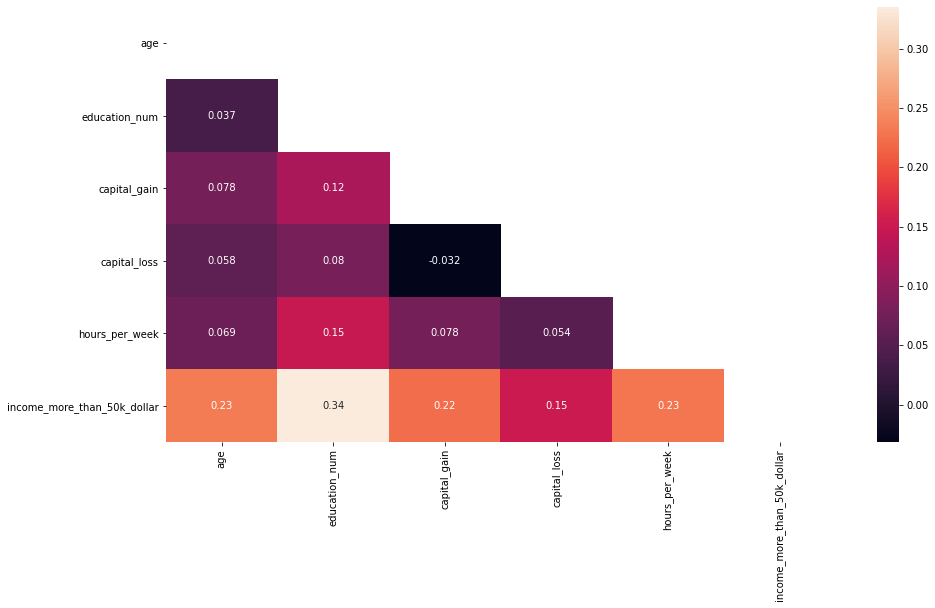

In [230]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr, mask=mask, annot=True)
plt.show()

### 04 - Data Pre Processing

In [215]:
pre_processed = pd.get_dummies(data = people_income,columns=["workclass","education","marital_status","occupation","relationship","race","sex","native_country"],drop_first=True)

In [216]:
pre_processed

,age,education_num,capital_gain,capital_loss,hours_per_week,income_more_than_50k_dollar,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,9,0,0,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,58,9,0,0,40,0,

In [217]:
# scale the data
X = pre_processed.drop('income_more_than_50k_dollar', axis=1) #feature data set
y = pre_processed['income_more_than_50k_dollar']

#Standardizing/scaling the features
X = StandardScaler().fit_transform(X)

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [219]:
classification = LogisticRegression(random_state=0, solver ='lbfgs', max_iter = 400, multi_class = 'ovr').fit(X_train, y_train)

In [220]:
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)
accuracy_score(y_test, predictions)

0.8476845596364083